Train shape: (4000, 6, 1, 1)    Test shape: (1000, 6, 1, 1)


C:\Users\Ismail\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9408 - loss: 0.2220 - val_accuracy: 0.9510 - val_loss: 0.1056
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9808 - loss: 0.0522 - val_accuracy: 0.9950 - val_loss: 0.0219
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9973 - loss: 0.0133 - val_accuracy: 0.9970 - val_loss: 0.0079
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9980 - loss: 0.0076 - val_accuracy: 0.9990 - val_loss: 0.0040
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9987 - loss: 0.0040 - val_accuracy: 0.9990 - val_loss: 0.0030
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 0.0028 - val_accuracy: 0.9970 - val_loss: 0.0040
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9990 - val_loss: 0.0020
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9992 - loss: 0.0023 - val_accuracy: 0.

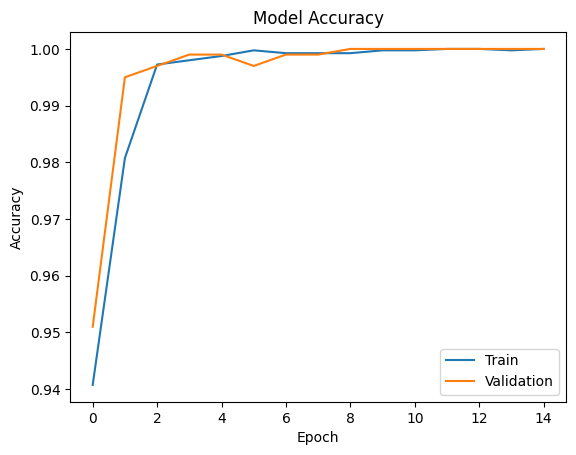

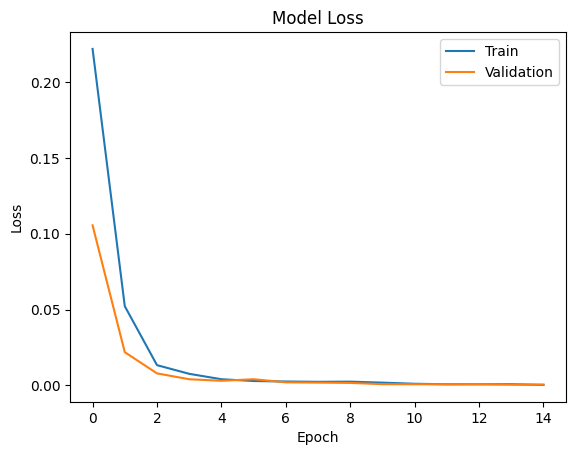


Test Accuracy: 100.00%

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
=== Classification Report ===
              precision    recall  f1-score   support

Normal Buyer       1.00      1.00      1.00       951
     Scalper       1.00      1.00      1.00        49

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


=== Confusion Matrix ===
                Pred_Normal  Pred_Scalper
Actual_Normal           951             0
Actual_Scalper            0            49


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Import TensorFlow
from tensorflow.keras import layers, models

# 1. Load dataset
df = pd.read_csv('synthetic_ticketing_dataset.csv')

# 2. Drop non-numeric/categorical columns
df_model = df.drop(['user_id', 'location', 'device', 'event_demand', 'purchase_date'], axis=1)

# 3. Features and label
X = df_model.drop('scalper', axis=1).values
y = df_model['scalper'].values

# 4. Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# 5. Reshape to (samples, height, width, channels)
n_features = X.shape[1]
X = X.reshape((-1, n_features, 1, 1))

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train shape: {X_train.shape}    Test shape: {X_test.shape}")

# 7. CNN model
model = models.Sequential([
    layers.Conv2D(16, (3,1), activation='relu', input_shape=(n_features, 1, 1)),
    layers.MaxPooling2D((2,1)),
    layers.Conv2D(32, (2,1), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 8. Train model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=16,
    validation_data=(X_test, y_test)
)

# 9. Plot training & validation accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# 10. Plot training & validation loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 11. Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%\n")

# 12. Predictions & report
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Normal Buyer', 'Scalper']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual_Normal', 'Actual_Scalper'],
                          columns=['Pred_Normal', 'Pred_Scalper'])
print("\n=== Confusion Matrix ===")
print(cm_df)


In [2]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 4, 1, 16)       │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 2, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 1, 1, 32)       │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,893 (38.65 KB)

 Trainable params: 3,297 (12.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,596 (25.77 KB)